In [21]:
%pip install scipy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sippa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.3/11.1 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.1 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.1 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.1 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.1 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.1 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 5.2 MB/s eta 0:00:02
   --------- ---------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sippa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [13]:
# Scatter plots with histograms and normal distributions
def viz(data, mu, sd):
    green = '#40909A'
    orange = '#C76C2B'
    alpha = 0.5
    plt.figure()

    data_min = min(min(data[0]), min(data[1]))
    data_maz = max(max(data[0]), max(data[1]))

    # Plot the 1st normal
    x = np.linspace(data_min, data_maz, 100)
    p = norm.pdf(x, mu[0], sd[0])
    plt.plot(x, p, linewidth=2, color=green)

    # Plot the 2nd normal
    x = np.linspace(data_min, data_maz, 100)
    p = norm.pdf(x, mu[1], sd[1])
    plt.plot(x, p, linewidth=2, color=green)

    # Plot the histograms
    _ = plt.hist(data[0], bins=10, density=True, color=green, alpha=alpha)
    _ = plt.hist(data[1], bins=10, density=True, color=orange, alpha=alpha)

    # PLot the scatters
    plt.plot(data1, np.zeros(len(data[0])), linestyle='None', marker='o', markersize=10, alpha=alpha, color=green)
    plt.plot(data2, np.zeros(len(data[1])), linestyle='None', marker='o', markersize=10, alpha=alpha, color=orange)

    # Remove the frame (borders)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


In [14]:
# Generate 1D data from two normal distributions
mu = [1,3]
sd = [.8,.5]
data1 = np.random.normal(mu[0], sd[0], size=100)
data2 = np.random.normal(mu[1], sd[1], size=50)

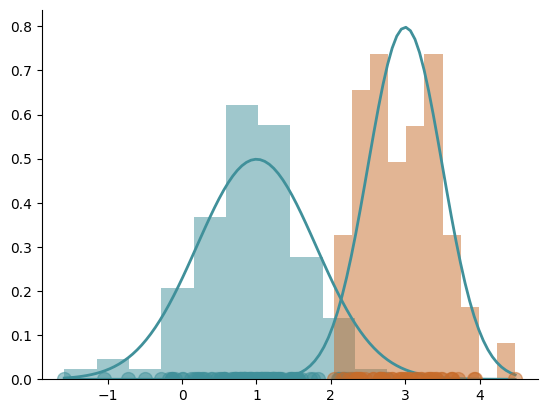

In [15]:
# Visualuze the data generated by the two normal distributions
viz([list(data1)]+[list(data2)],mu,sd)

In [22]:
# Given the generated data, infer the means and the variances
import numpy as np
data = np.expand_dims(list(data1)+list(data2), axis=1)

# GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, init_params='random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)

GMM >>>
p(x) = 0.72Normal(1.01,0.81) + 0.28Normal(3.05,0.53)


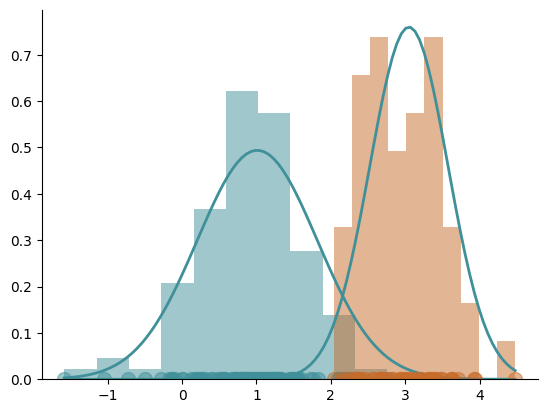

In [30]:
print('GMM >>>')
# HW
w1, w2 = gmm.weights_
mu1, mu2 = gmm.means_.flatten()
sd1, sd2 = np.sqrt(gmm.covariances_).flatten()

print('p(x) = %.2fNormal(%.2f,%.2f) + %.2fNormal(%.2f,%.2f)' % (w1,mu1,sd1,w2,mu2,sd2))

# Visualize the data and the inferred norms.
viz([list(data1)]+[list(data2)],[mu1,mu2],[sd1,sd2])
# End of HW